In [1]:
from util.bpc_util import *

In [2]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

/Users/Kevin/miniconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [3]:
plt.rcParams['figure.figsize'] = (7,5)

In [4]:
%load_ext autoreload

In [ ]:
%autoreload

# Synthetic Dataset 

We run the tests on the synthetic dataset, with the following settings:

* Normalized Laplacian (i.e. $\chi_k$ are now normalized by degree matrix $D$)
* ...

## Regime 1
$$\epsilon = \tau^2, \gamma = \tau^{\alpha}$$

This corresponds to ``little_oh = False``

In [ ]:
rand = True
Ns = [100,100,100]
fs = 5
density_= 0.8
normalized = True
little_oh = False
_save = False

norm_s = 'n'
if not normalized:
    norm_s = 'u'
param_str = 'rand_%d_Ns_%d_%d_%d_fs_%d_L_%s_lo_%d' % (int(rand), Ns[0], Ns[1], Ns[2], fs, norm_s, int(little_oh))
print(param_str)


# Get the overall setup, including ground truth u and separated graph W_0
Ns, u, B, labeled, draws, W_0 = syn_overall_setup(rand, Ns, fs, normalized, density_)


n = 20
T   = np.power(0.6, range(5, n+5))
ALPHAS = [0.25,0.5,0.75, 1, 1.5, 2, 2.5, 3., 3.5, 4., 4.5, 5.]
TRC, TRCBC, BIAS = syn_run_test(T, ALPHAS, Ns, B, labeled, u, W_0, little_oh=little_oh) 


print(TRC.shape)
print(TRCBC.shape)
print(BIAS.shape)

In [ ]:
syn_plot_data(T, TRC, ALPHAS, param_str, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, Jval=-1, little_oh=little_oh)
syn_plot_data(T, TRCBC, ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save, Jval=-1, little_oh=little_oh)
syn_plot_data(T, BIAS, ALPHAS, param_str, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, Jval=-1, little_oh=little_oh)

In [ ]:
nt = len(T)
t_ranges = len(ALPHAS)*[(12,nt)]
_save=True
rms=150

syn_plot_data_range(T, TRC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, little_oh=little_oh, _rms=rms)
syn_plot_data_range(T, TRCBC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save,little_oh=little_oh, _rms=rms)

#t_ranges = [(9,nt), (9,nt),(9,nt), (13,nt), (11,nt), (11,nt), (11,nt)] + (len(ALPHAS)-7)*[(11,nt)]
syn_plot_data_range(T, BIAS, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, little_oh=little_oh, _rms=rms)
np.savez('./figures/BPCpaper/%s_data'%param_str, T=T, ALPHAS=ALPHAS, TRC=TRC, TRCBC=TRCBC, BIAS=BIAS)

## Regime 2
$$\epsilon = \tau^3, \gamma = \tau^{\alpha}$$

This corresponds to ``little_oh = True``

In [ ]:
rand = True
Ns = [100,100,100]
fs = 5
density_= 0.8
normalized = True
little_oh = True
_save = False

norm_s = 'n'
if not normalized:
    norm_s = 'u'
param_str = 'rand_%d_Ns_%d_%d_%d_fs_%d_L_%s_lo_%d' % (int(rand), Ns[0], Ns[1], Ns[2], fs, norm_s, int(little_oh))
print(param_str)


# Get the overall setup, including ground truth u and separated graph W_0
Ns, u, B, labeled, draws, W_0 = syn_overall_setup(rand, Ns, fs, normalized, density_)


n = 20
T   = np.power(0.6, range(5, n+5))
#ALPHAS = [0.25,0.5,0.75, 1, 1.5, 2, 2.5, 3.]
TRC, TRCBC, BIAS = syn_run_test(T, ALPHAS, Ns, B, labeled, u, W_0, little_oh=little_oh) 




In [ ]:
syn_plot_data(T, TRC, ALPHAS, param_str, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, Jval=-1, little_oh=little_oh)
syn_plot_data(T, TRCBC, ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save, Jval=-1, little_oh=little_oh)
syn_plot_data(T, BIAS, ALPHAS, param_str, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, Jval=-1, little_oh=little_oh)

In [ ]:
nt = len(T)
print(nt)
t_ranges = [(9,nt), (9,nt),(9,nt), (8,16), (8,16), (8,16), (8,16)] + (len(ALPHAS) - 7)*[(8,16)]
_save=True
rms=150

syn_plot_data_range(T, TRC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, little_oh=little_oh,_rms=rms)
syn_plot_data_range(T, TRCBC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save, little_oh=little_oh,_rms=rms)
syn_plot_data_range(T, BIAS, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, little_oh=little_oh,_rms=rms)

np.savez('./figures/BPCpaper/%s_data'%param_str, T=T, ALPHAS=ALPHAS, TRC=TRC, TRCBC=TRCBC, BIAS=BIAS)

# Epsilon = 0 Case

In [ ]:
rand = True
Ns = [100,100,100]
fs = 5
density_= 0.8
normalized = True
_save = False

norm_s = 'n'
if not normalized:
    norm_s = 'u'
param_str = 'rand_%d_Ns_%d_%d_%d_fs_%d_L_%s_zero' % (int(rand), Ns[0], Ns[1], Ns[2], fs, norm_s)
print(param_str)


# Get the overall setup, including ground truth u and separated graph W_0
Ns, u, B, labeled, draws, W_0 = syn_overall_setup(rand, Ns, fs, normalized, density_)


n = 20
T   = np.power(0.6, range(5, n+5))
#ALPHAS = [0.5,0.8, 1, 1.5, 2, 2.5, 3.]
TRC, TRCBC, BIAS = syn_run_test0(T, ALPHAS, Ns, B, labeled, u, W_0) 



In [ ]:
syn_plot_data(T, TRC, ALPHAS, param_str, title_= r'$\mathrm{Tr}(C_0^*)$', \
          val_str='TRC', save=_save, Jval=-1)
syn_plot_data(T, TRCBC, ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_0^*BC_0^*)$', \
          val_str='TRCBC', save=_save, Jval=-1)
syn_plot_data(T, BIAS, ALPHAS, param_str, title_= r'$|C_0^*C_{\tau, 0}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, Jval=-1)

In [ ]:
nt = len(T)
print(nt)
t_ranges = [(9,nt-2), (9,nt-2),(9,nt-2), (9,nt-2), (9,nt-2),(9,nt-2), (9,nt-2)] + (len(ALPHAS)-7)*[(9,nt-2)]
_save=True
rms=150

syn_plot_data_range(T, TRC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\mathrm{Tr}(C_0^*)$', \
          val_str='TRC', save=_save, little_oh=little_oh, zero=True,_rms=rms)
syn_plot_data_range(T, TRCBC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_0^*BC_0^*)$', \
          val_str='TRCBC', save=_save,little_oh=little_oh, zero=True,_rms=rms)
t_ranges = [(5,nt), (5,nt),(5,nt), (3,12), (1,8), (1,8), (1,7)] + (len(ALPHAS)-7)*[(0,3)]
syn_plot_data_range(T, BIAS, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_0^*C_{\tau, 0}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, little_oh=little_oh, zero=True,_rms=rms, _loc='upper left')

np.savez('./figures/BPCpaper/%s_data'%param_str, T=T, ALPHAS=ALPHAS, TRC=TRC, TRCBC=TRCBC, BIAS=BIAS)

### Observations

The slope in the BIAS plots do follow the expected curve of $\tau^{4\alpha}$.

# Load Previous Calculated Data 

Edit the plots for previous calculated data. 

Input in the variable ``old_data_filename`` the filepath to the folder that contains the ``.npz`` files containing the previously computed data. We will overwrite the plots contained in this same file location when we save the new plots generated.



In [5]:
old_data_filename = './figures/BPCpaper_rand1_2/'

In [66]:
%autoreload

## Regime 1 - Big Oh

Line fitting for TRC
The slope (in terms of gamma) for alpha = 0.5 is : 1.9948
The slope (in terms of gamma) for alpha = 0.8 is : 1.9999
The slope (in terms of gamma) for alpha = 1.0 is : 2.0000
The slope (in terms of gamma) for alpha = 2.0 is : 2.0000
The slope (in terms of gamma) for alpha = 3.0 is : 2.0000
The slope (in terms of gamma) for alpha = 4.0 is : 2.0000
The slope (in terms of gamma) for alpha = 5.0 is : 2.0000
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_lo_0_TRC.png


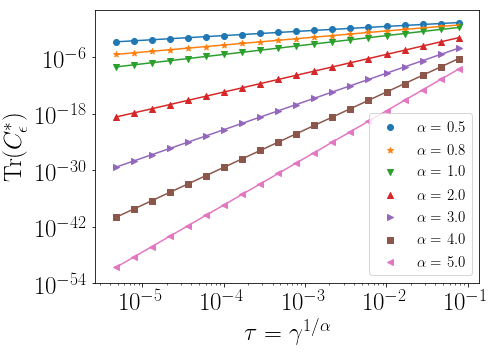

Line fitting for TRCBC
The slope (in terms of gamma) for alpha = 0.5 is : 1.9649
The slope (in terms of gamma) for alpha = 0.8 is : 1.9992
The slope (in terms of gamma) for alpha = 1.0 is : 2.0000
The slope (in terms of gamma) for alpha = 2.0 is : 2.0000
The slope (in terms of gamma) for alpha = 3.0 is : 2.0000
The slope (in terms of gamma) for alpha = 4.0 is : 2.0000
The slope (in terms of gamma) for alpha = 5.0 is : 2.0000
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_lo_0_TRCBC.png


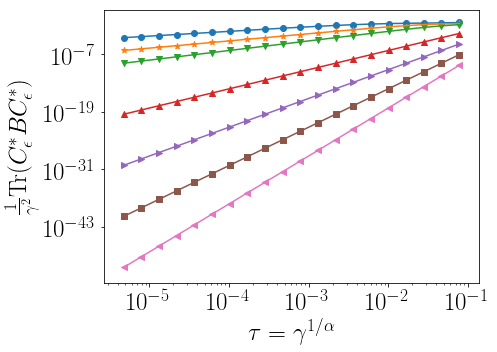

Line fitting for BIAS
The slope (in terms of gamma) for alpha = 0.5 is : 3.9550
The slope (in terms of gamma) for alpha = 0.8 is : 3.9991
The slope (in terms of gamma) for alpha = 1.0 is : 4.0002
The slope (in terms of gamma) for alpha = 2.0 is : 2.0030
The slope (in terms of gamma) for alpha = 3.0 is : 1.3352
The slope (in terms of gamma) for alpha = 4.0 is : 1.0014
The slope (in terms of gamma) for alpha = 5.0 is : 0.8011
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_lo_0_BIAS.png


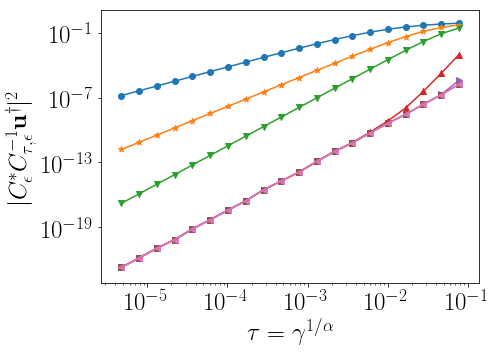

In [63]:
beta= 2.

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_0'
r1_data = np.load(old_data_filename + param_str+'_data.npz')
T = r1_data['T']
ALPHAS = r1_data['ALPHAS']
TRC = r1_data['TRC']
TRCBC = r1_data['TRCBC']
BIAS = r1_data['BIAS']

nt = len(T)
_save=True
rms=150
ind = [1,2,3,5,7,9,11]
ALPHAS_ = [ALPHAS[i] for i in ind]
t_ranges = len(ALPHAS_)*[(9,nt-1)]

syn_plot_data_gamma(T, TRC[ind,:], ALPHAS_, param_str, t_ranges=t_ranges, Jval=-1, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, beta=beta, legend=True)
syn_plot_data_gamma(T, TRCBC[ind,:], ALPHAS_, param_str, t_ranges=t_ranges, Jval=-1, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save,beta=beta)
syn_plot_data_gamma(T, BIAS[ind,:], ALPHAS_, param_str, t_ranges=t_ranges, Jval=-1, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, beta=beta)
np.savez('./figures/BPCpaper/%s_data'%param_str, T=T, ALPHAS=ALPHAS, TRC=TRC, TRCBC=TRCBC, BIAS=BIAS)

In [ ]:
nt = len(T)
t_ranges = len(ALPHAS)*[(9,nt-2)]
_save=True
rms=150

syn_plot_data_range(T, TRC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, little_oh=little_oh, _rms=rms, file2save=old_data_filename)
syn_plot_data_range(T, TRCBC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save,little_oh=little_oh, _rms=rms, file2save=old_data_filename)

t_ranges = [(9,nt), (9,nt),(9,nt), (13,nt), (13,nt), (13,nt), (13,nt)]
syn_plot_data_range(T, BIAS, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, little_oh=little_oh, _rms=rms, file2save=old_data_filename)

## Regime 2 - Little Oh

Line fitting for TRC
The slope (in terms of gamma) for alpha = 0.5 is : 1.9953
The slope (in terms of gamma) for alpha = 0.8 is : 1.9999
The slope (in terms of gamma) for alpha = 1.0 is : 2.0000
The slope (in terms of gamma) for alpha = 2.0 is : 2.0000
The slope (in terms of gamma) for alpha = 3.0 is : 2.0000
The slope (in terms of gamma) for alpha = 4.0 is : 2.0000
The slope (in terms of gamma) for alpha = 5.0 is : 2.0000
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_lo_1_TRC.png


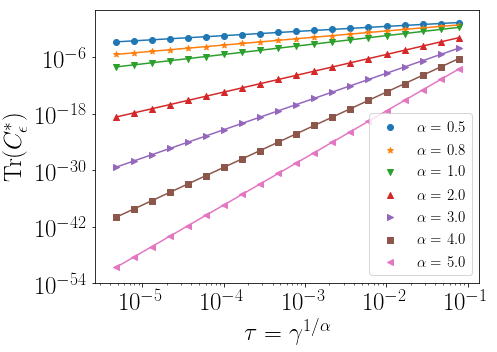

Line fitting for TRCBC
The slope (in terms of gamma) for alpha = 0.5 is : 1.9682
The slope (in terms of gamma) for alpha = 0.8 is : 1.9994
The slope (in terms of gamma) for alpha = 1.0 is : 2.0000
The slope (in terms of gamma) for alpha = 2.0 is : 2.0000
The slope (in terms of gamma) for alpha = 3.0 is : 2.0000
The slope (in terms of gamma) for alpha = 4.0 is : 2.0000
The slope (in terms of gamma) for alpha = 5.0 is : 2.0000
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_lo_1_TRCBC.png


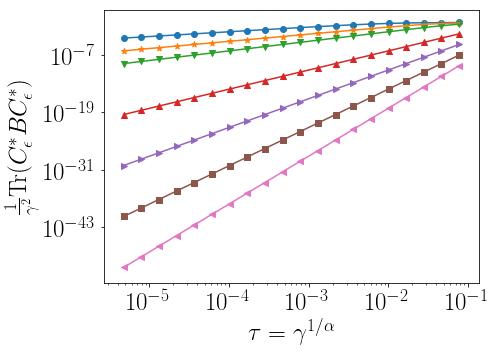

Line fitting for BIAS
The slope (in terms of gamma) for alpha = 0.5 is : 3.9671
The slope (in terms of gamma) for alpha = 0.8 is : 4.0000
The slope (in terms of gamma) for alpha = 1.0 is : 4.0006
The slope (in terms of gamma) for alpha = 2.0 is : 2.9684
The slope (in terms of gamma) for alpha = 3.0 is : 1.9877
The slope (in terms of gamma) for alpha = 4.0 is : 1.4809
The slope (in terms of gamma) for alpha = 5.0 is : 1.1825
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_lo_1_BIAS.png


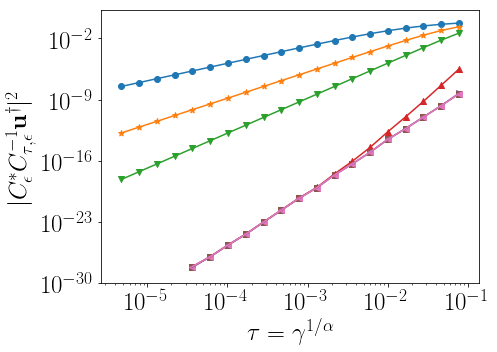

In [67]:
beta= 3.

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_1'
r2_data = np.load(old_data_filename + param_str+'_data.npz')
T = r2_data['T']
ALPHAS = r2_data['ALPHAS']
TRC = r2_data['TRC']
TRCBC = r2_data['TRCBC']
BIAS = r2_data['BIAS']

nt = len(T)
_save=True
rms=150
ind = [1,2,3,5,7,9,11]
ALPHAS_ = [ALPHAS[i] for i in ind]
t_ranges = len(ALPHAS_)*[(9,nt-4)]

syn_plot_data_gamma(T, TRC[ind,:], ALPHAS_, param_str, t_ranges=t_ranges, Jval=-1, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, beta=beta, legend=True)
syn_plot_data_gamma(T, TRCBC[ind,:], ALPHAS_, param_str, t_ranges=t_ranges, Jval=-1, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save,beta=beta)

plot_ranges = 3*[(0,nt)] + len(ALPHAS_)*[(0,-4)]
syn_plot_data_gamma(T, BIAS[ind,:], ALPHAS_, param_str, t_ranges=t_ranges, Jval=-1, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, beta=beta, plot_ranges=plot_ranges)
np.savez('./figures/BPCpaper/%s_data'%param_str, T=T, ALPHAS=ALPHAS, TRC=TRC, TRCBC=TRCBC, BIAS=BIAS)

In [ ]:
little_oh = True

param_str = 'rand_0_Ns_100_100_100_fs_5_L_n_lo_1'
r2_data = np.load(old_data_filename + param_str+'_data.npz')
T = r2_data['T']
ALPHAS = r2_data['ALPHAS']
TRC = r2_data['TRC']
TRCBC = r2_data['TRCBC']
BIAS = r2_data['BIAS']

In [ ]:
nt = len(T)
print(nt)
t_ranges = [(9,nt), (9,nt),(9,nt), (8,16), (8,16), (8,16), (8,16)]
_save=True
rms=150

syn_plot_data_range(T, TRC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, little_oh=little_oh,_rms=rms, file2save=old_data_filename)
syn_plot_data_range(T, TRCBC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save, little_oh=little_oh,_rms=rms, file2save=old_data_filename)
syn_plot_data_range(T, BIAS, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, little_oh=little_oh,_rms=rms, file2save=old_data_filename)

## Regime 3 - $\epsilon = 0$

Line fitting for TRC
The slope (in terms of gamma) for alpha = 0.5 is : 1.9971
The slope (in terms of gamma) for alpha = 0.8 is : 1.9999
The slope (in terms of gamma) for alpha = 1.0 is : 2.0000
The slope (in terms of gamma) for alpha = 2.0 is : 2.0000
The slope (in terms of gamma) for alpha = 3.0 is : 2.0000
The slope (in terms of gamma) for alpha = 4.0 is : 2.0000
The slope (in terms of gamma) for alpha = 5.0 is : 2.0000
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_zero_TRC.png


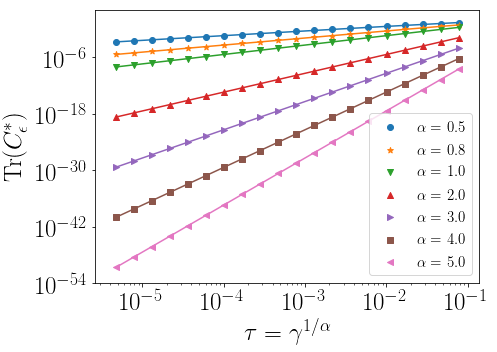

Line fitting for TRCBC
The slope (in terms of gamma) for alpha = 0.5 is : 1.9801
The slope (in terms of gamma) for alpha = 0.8 is : 1.9997
The slope (in terms of gamma) for alpha = 1.0 is : 2.0000
The slope (in terms of gamma) for alpha = 2.0 is : 2.0000
The slope (in terms of gamma) for alpha = 3.0 is : 2.0000
The slope (in terms of gamma) for alpha = 4.0 is : 2.0000
The slope (in terms of gamma) for alpha = 5.0 is : 2.0000
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_zero_TRCBC.png


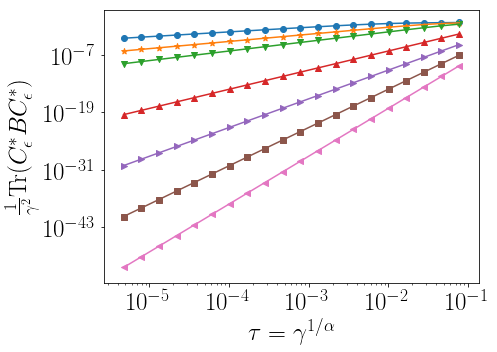

Line fitting for BIAS
The slope (in terms of gamma) for alpha = 0.5 is : 3.9790
The slope (in terms of gamma) for alpha = 0.8 is : 3.9996
The slope (in terms of gamma) for alpha = 1.0 is : 4.0000
The slope (in terms of gamma) for alpha = 2.0 is : 3.9999
The slope (in terms of gamma) for alpha = 3.0 is : 3.9974
The slope (in terms of gamma) for alpha = 4.0 is : 3.9950
The slope (in terms of gamma) for alpha = 5.0 is : 3.9929
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_zero_BIAS.png


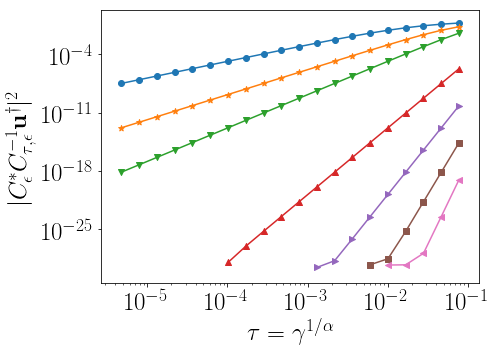

In [71]:
beta= -1

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_zero'
r3_data = np.load(old_data_filename + param_str+'_data.npz')
T = r3_data['T']
ALPHAS = r3_data['ALPHAS']
TRC = r3_data['TRC']
TRCBC = r3_data['TRCBC']
BIAS = r3_data['BIAS']

nt = len(T)
_save=True
rms=150
ind = [1,2,3,5,7,9,11]
ALPHAS_ = [ALPHAS[i] for i in ind]
t_ranges = len(ALPHAS_)*[(9,nt-1)] 

syn_plot_data_gamma(T, TRC[ind,:], ALPHAS_, param_str, t_ranges=t_ranges, Jval=-1, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, beta=beta, legend=True)
syn_plot_data_gamma(T, TRCBC[ind,:], ALPHAS_, param_str, t_ranges=t_ranges, Jval=-1, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save,beta=beta)
t_ranges = 3*[(9,nt-1)] + [(4,8)] + [(0,5)] + [(0,3)] + [(0,2)]
plot_ranges = 3*[(0,nt)] + [(0,-6)] + [(0,9)] + [(0,6)] + [(0,5)]
syn_plot_data_gamma(T, BIAS[ind,:], ALPHAS_, param_str, t_ranges=t_ranges, Jval=-1, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, beta=beta, plot_ranges=plot_ranges)
np.savez('./figures/BPCpaper/%s_data'%param_str, T=T, ALPHAS=ALPHAS, TRC=TRC, TRCBC=TRCBC, BIAS=BIAS)

In [ ]:
little_oh = False
zero=True

param_str = 'rand_0_Ns_100_100_100_fs_5_L_n_zero'
r3_data = np.load(old_data_filename + param_str+'_data.npz')
T = r3_data['T']
ALPHAS = r3_data['ALPHAS']
TRC = r3_data['TRC']
TRCBC = r3_data['TRCBC']
BIAS = r3_data['BIAS']

In [ ]:
nt = len(T)
t_ranges = [(9,nt-2), (9,nt-2),(9,nt-2), (9,nt-2), (9,nt-2),(9,nt-2), (9,nt-2)]
_save=True
rms=150

syn_plot_data_range(T, TRC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\mathrm{Tr}(C_0^*)$', \
          val_str='TRC', save=_save, little_oh=little_oh, zero=True,_rms=rms, file2save=old_data_filename)
syn_plot_data_range(T, TRCBC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_0^*BC_0^*)$', \
          val_str='TRCBC', save=_save,little_oh=little_oh, zero=True,_rms=rms, file2save=old_data_filename)
t_ranges = [(5,nt), (5,nt),(5,nt), (3,12), (1,8), (1,8), (1,7)]
syn_plot_data_range(T, BIAS, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_0^*C_{\tau, 0}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, little_oh=little_oh, zero=True,_rms=rms, _loc='upper left', file2save=old_data_filename)

# $\alpha$ Plot

In [78]:
old_data_filename = './figures/BPCpaper_rand1_3/'

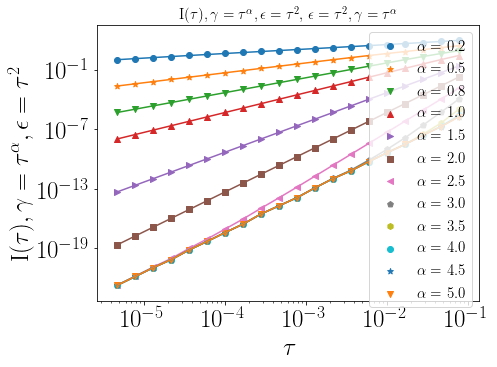

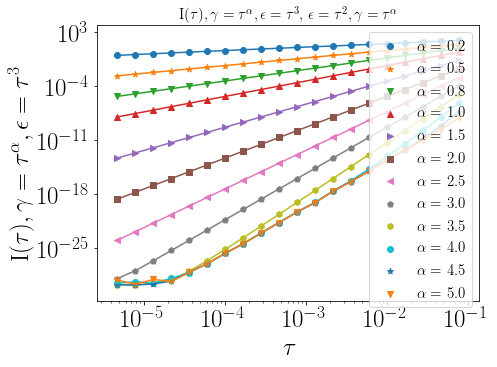

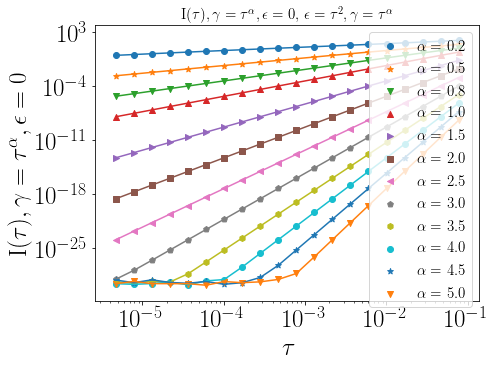

In [79]:
DATA = {}
_save = False

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_0'
r1_data = np.load(old_data_filename + param_str+'_data.npz')
T = r1_data['T']
ALPHAS = r1_data['ALPHAS']
TRC = r1_data['TRC']
TRCBC = r1_data['TRCBC']
BIAS = r1_data['BIAS']
DATA[0] = TRC + TRCBC + BIAS
syn_plot_data(T, DATA[0], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=\tau^{2}$', \
          val_str='I', save=_save, Jval=-1)

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_1'
r2_data = np.load(old_data_filename + param_str+'_data.npz')
ALPHAS = r2_data['ALPHAS']
TRC = r2_data['TRC']
TRCBC = r2_data['TRCBC']
BIAS = r2_data['BIAS']
DATA[1] = TRC + TRCBC + BIAS
syn_plot_data(T, DATA[1], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=\tau^{3}$', \
          val_str='I', save=_save, Jval=-1)

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_zero'
r3_data = np.load(old_data_filename + param_str+'_data.npz')
ALPHAS = r3_data['ALPHAS']
TRC = r3_data['TRC']
TRCBC = r3_data['TRCBC']
BIAS = r3_data['BIAS']
DATA[2] = TRC + TRCBC + BIAS
syn_plot_data(T, DATA[2], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=0$', \
          val_str='I', save=_save, Jval=-1)

In [80]:
print(ALPHAS)

[0.25 0.5  0.75 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.  ]


In [85]:
LS = {}
n_alpha = len(ALPHAS)
TRANGES = [n_alpha*[(16,len(T))], 9*[(13,17)] + (len(ALPHAS)-9)*[(11,16)], int(n_alpha/2+1)*[(14,len(T)-2)] + int(n_alpha/2+1)*[(1,8)] ]
for r in [0,1,2]:
    line_stats = np.zeros((n_alpha,2))
    data = DATA[r]
    t_ranges = TRANGES[r]
    print(t_ranges)
    
    for i in range(n_alpha):
        j_start, j_end = t_ranges[i]
        t = np.log(T[j_start:j_end])
        A = np.array([t, np.ones(len(t))]).T
        b = np.log(data[i,j_start:j_end])
        res = lsq_linear(A, b)
        line_stats[i,:] = res.x
        #print('The slope for alpha = %1.1f is : %2.4f' % (ALPHAS[i], res.x[0]))
        #file_string += '%1.1f, %2.4f\n' % (ALPHAS[i], res.x[0])
    LS[r] = line_stats[:,0].flatten()
    
    #syn_plot_data_range(T, data, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_0^*C_{\tau, 0}^{-1}\mathbf{u}^\dagger|^2$', \
    #     val_str='BIAS', save=_save, little_oh=little_oh, zero=True,_rms=rms, _loc='upper left', file2save=old_data_filename)
    

[(16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20)]
[(13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (11, 16), (11, 16), (11, 16)]
[(14, 18), (14, 18), (14, 18), (14, 18), (14, 18), (14, 18), (14, 18), (1, 8), (1, 8), (1, 8), (1, 8), (1, 8), (1, 8), (1, 8)]


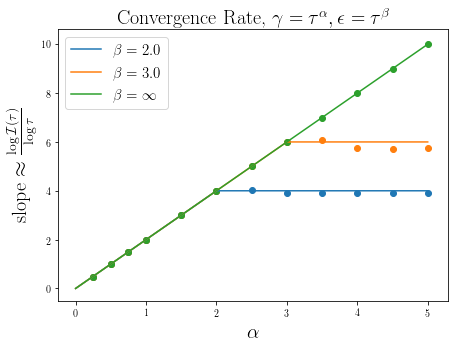

In [86]:
alpha = np.linspace(0.,5.,101)
BETAS = [2.,3.]
for r in [0,1]:
    f = 2.*alpha
    f[np.where(alpha >= BETAS[r])]  = 2.*BETAS[r]
    plt.plot(alpha, f, label=r'$\beta =$ %1.1f'% BETAS[r])
    plt.scatter(ALPHAS, LS[r])
f = 2*alpha
plt.plot(alpha, f, label=r'$\beta = \infty$')
plt.scatter(ALPHAS, LS[2])
plt.legend(fontsize=15)
plt.title(r'Convergence Rate, $\gamma=\tau^\alpha, \epsilon=\tau^\beta$', fontsize=20)
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'slope $\approx\frac{\log\mathcal{I}(\tau)}{\log \tau}$', fontsize=20)
plt.savefig('cr_tau.png')
plt.show()

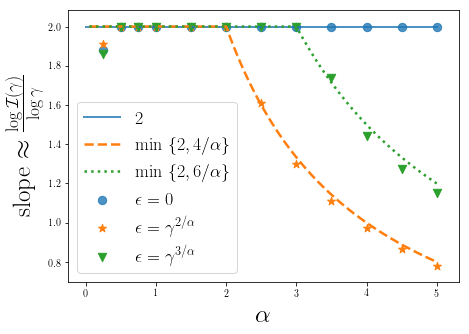

In [122]:
alpha = np.linspace(0.,5.,101)
BETAS = [2,3]
f = len(alpha)*[2.]
plt.plot(alpha, f, label=r'$2$', linewidth=2.0, alpha=0.8)
plt.scatter(ALPHAS, LS[2]/ALPHAS, label=r'$\epsilon=0$', s=70, alpha=0.8)
markers= ['*', 'v']
line_types = ['--', ':']
for r in [0,1]:
    f = 2.*alpha
    f[np.where(alpha >= BETAS[r])]  = 2.*BETAS[r]
    numerator_int = int(2 *BETAS[r])
    plt.plot(alpha[1:], f[1:]/alpha[1:], line_types[r], label= r'min $\{2,%d/\alpha\}$'% numerator_int, linewidth=2.5)
    plt.scatter(ALPHAS, LS[r]/ALPHAS, label=r'$\epsilon = \gamma^{%d/\alpha}$'% BETAS[r], marker=markers[r], s=70)

plt.legend(fontsize=18)
#plt.title(r'Convergence Rate, $\tau = \gamma^{1/\alpha}, \epsilon=\gamma^{\beta/\alpha}$', fontsize=20)
plt.xlabel(r'$\alpha$', fontsize=25)
plt.ylabel(r'slope $\approx\frac{\log\mathcal{I}(\gamma)}{\log \gamma}$', fontsize=25)
plt.savefig('cr_gamma.png')
plt.show()

# Voting Records Code

In [ ]:
%autoreload

In [ ]:
sup_percent = 0.1
n = 10
T   = np.power(0.6, range(5, n+5))
ALPHAS = [0.5, 1, 1.5, 2, 2.5, 3.]
SIGMAS = [0.25*i for i in range(1, 10)]

TRC, TRCBC, BIAS = voting_run_test(SIGMAS, T, ALPHAS, rand=True, sup_percent=sup_percent, normalized=True)

In [ ]:
_save = False
param_str = 'VotingRecords'

for i,sigma in enumerate(SIGMAS):
    print("sigma = %1.3f" % sigma)
    voting_plot_data(T, TRC[:,:, i], ALPHAS, param_str, title_= r'$\mathrm{Tr}(C^*)$', \
              val_str='TRC', save=_save)
    voting_plot_data(T, TRCBC[:,:, i], ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C^*BC^*)$', \
              val_str='TRCBC', save=_save)
    voting_plot_data(T, BIAS[:,:,i], ALPHAS, param_str, title_= r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{v}|^2$', \
              val_str='BIAS', save=_save)

In [ ]:
_save = False
param_str = 'VotingRecords'

for i,alpha in enumerate(ALPHAS):
    print("alpha = %1.3f" % alpha)
    voting_plot_data2(T, TRC[i,:,:], SIGMAS, param_str, title_= r'$\mathrm{Tr}(C^*)$', \
              val_str='TRC', save=_save)
    voting_plot_data2(T, TRCBC[i,:,:], SIGMAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C^*BC^*)$', \
              val_str='TRCBC', save=_save)
    voting_plot_data2(T, BIAS[i,:,:], SIGMAS, param_str, title_= r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{v}|^2$', \
              val_str='BIAS', save=_save)

### Observations

The BIAS plot shows that we are limited by the value of $\epsilon$ which is constant for each value of the kernel width, $\sigma$.